How does sp influence classification and regression results?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.feature_selection as feat_sel

import detect_simpsons_paradox as dsp
import sp_data_util as spdata
from sp_data_util import sp_plot

200
40


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,K,L,M,N,O,P,Q,R,S,T
0,13.583919,12.879742,11.075194,10.603000,16.918603,15.339210,7.755824,7.691560,5.324431,8.890310,...,K0,L1,M2,N3,O0,P0,Q4,R2,S3,T3
1,7.554760,6.709460,6.763834,8.157986,15.445634,12.398108,14.244705,14.198341,13.517171,12.062419,...,K4,L2,M0,N4,O1,P0,Q0,R1,S0,T1
2,14.010824,13.505209,5.988137,7.182081,6.574860,5.595771,16.256156,14.966243,7.725562,7.740580,...,K1,L4,M4,N2,O4,P0,Q1,R0,S2,T2
3,5.756685,6.340333,15.603825,13.831291,17.635105,15.147727,12.921104,12.636685,7.443972,9.210388,...,K3,L1,M2,N1,O2,P2,Q2,R0,S3,T3
4,11.993303,13.856148,10.783669,8.104344,10.718066,14.348316,11.451905,14.877322,11.173982,8.878696,...,K1,L1,M2,N3,O0,P4,Q0,R2,S3,T4


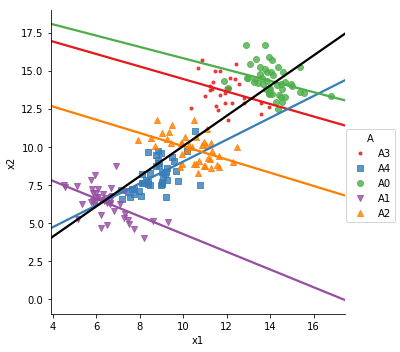

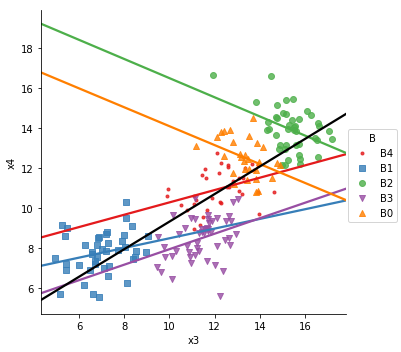

In [9]:
# setup
r_clusters = -.4  # correlation coefficient of clusters
cluster_spread = .9 # pearson correlation of means
p_sp_clusters = .7 # portion of clusters with SP 
k = 5 # number of clusters
cluster_size = [4,4]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters = [.5, .2, .1, .1, .1]

many_sp_df = spdata.geometric_indep_views_gmm_sp(20,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)

sp_plot(many_sp_df,'x1','x2','A')
sp_plot(many_sp_df,'x3','x4','B')
many_sp_df.head()

In [3]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(many_sp_df.T.loc['x2':'x4'].values.T,many_sp_df['x1'].T)
print(clf.coef_)
# X_new = feat_sel.SelectKBest(chi2, k=2).fit_transform(x, y)

[ 0.60242359 -0.04261599  0.01854271]


In [4]:
many_sp_df.T.loc['x2':'x4'].values.T

array([[10.02062272563205, 10.071668703534248, 6.958171702453165],
       [12.964378505130371, 14.314071486407856, 15.920328920503165],
       [12.895958175208877, 11.128429254763006, 8.54455734032603],
       [8.287687032846238, 10.99160882188851, 2.6310245708779587],
       [9.769938081636862, 12.517676396363385, 1.4698690545170472],
       [12.683044210797938, 9.39335309787196, 19.973607516534024],
       [12.732533804558553, 12.954824136544316, 2.537761275386012],
       [5.863951024776717, 12.461081276590132, 6.574297960985492],
       [12.51301178744672, 7.254878620039827, 15.089674210079878],
       [12.72574474814698, 11.034526808827671, 1.1616044491277635],
       [10.801846043083964, 10.208365307086897, 2.6606373404226322],
       [8.757322897711203, 10.280612689915243, 18.691352725201995],
       [4.849176759344462, 8.443153399376673, 12.894080449078091],
       [11.15750771423438, 11.098321572845341, 2.4594626140059366],
       [12.18991217488432, 11.772025251851733, 6.3658

In [5]:
many_sp_df['x1']

0      11.481854
1      11.679252
2       8.104702
3       6.673357
4       5.481614
5      13.253165
6       9.709014
7       7.313448
8      13.305177
9      12.142786
10      3.526865
11     10.423885
12      7.616728
13      4.453911
14     12.338946
15      8.617211
16      8.302110
17      7.755480
18      8.183295
19     11.929958
20     12.751341
21      9.244273
22      7.289515
23      6.717800
24     13.775450
25     13.247454
26      6.553686
27      9.793179
28     10.034654
29     10.697367
         ...    
170     6.094229
171    11.533921
172     7.361931
173    12.422007
174     5.750075
175     9.328655
176     8.729102
177     5.520436
178     5.782930
179    10.621904
180    10.310479
181     6.003519
182     9.608014
183    13.284994
184     7.737221
185     8.504151
186    13.334419
187     9.941862
188    10.129260
189     9.782301
190     8.041790
191     8.436718
192     7.740422
193    12.722305
194    14.250246
195     8.606188
196     2.808731
197     9.0291

When interested in regression of one of the continuous valued varialbes in a dataset, a common choice is to throw away the categorical variables, because that's what the interface of regression is. In cases of Simpson's Paradox, this is obviously a risky choice.  

If there's a lot of dimensions in the continuous features, categorical variables might be dropped for the simple reason that popular ML toolkits don't allow categorical variables to be used in feature selection.  This can result in throwing away important information.

In [ ]:
if x is None:
    print("yes")